<div align="center" style="font-family: Arial, sans-serif; background-color: #f0f0f0; padding: 100px; border-radius: 10px; width: 80%; margin: auto;">
    <h2 style="font-size: 24px; font-weight: bold; text-decoration: underline;">Лабораторная работа №1 (Проведение исследований с алгоритмом KNN)</h2>
    <div style="font-size: 18px; margin-top: 20px; text-align: left;">
        <strong><h4 style="color: #2E64FE; font-weight: bold; text-align: center;">Выбор начальных условий:</strong></h2>
        <ul style="list-style-type: none; padding-left: 0;color: #333;">
            <li>- Выбрать набор данных для задачи классификации (у каждого студента должен быть уникальный набор данных) и обосновать его выбор (реальная практическая задача).</li>
            <li>- Выбрать набор данных для задачи регрессии классификации (у каждого студента должен быть уникальный набор данных) и обосновать его выбор (реальная практическая задача).</li>
            <li>- Выбрать метрики качества и обосновать их выбор.</li>
        </ul>
        <strong><h4 style="color: #2E64FE; font-weight: bold; text-align: center;">Создание бейзлайна и оценка качества:</strong></h2>
        <ul style="list-style-type: none; padding-left: 0;color: #333;">
            <li>- Обучить модели из sklearn (для классификации и регрессии) для выбранных наборов данных.</li>
            <li>- Оценить качество моделей (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных.</li>
        </ul>
        <strong><h4 style="color: #2E64FE; font-weight: bold; text-align: center;">Улучшение бейзлайна:</strong></h2>
        <ul style="list-style-type: none; padding-left: 0;color: #333;">
            <li>- Сформулировать гипотезы (препроцессинг данных, визуализация данных, формирование новых признаков, подбор гиперпараметров на кросс-валидации и т.д.).</li>
            <li>- Проверить гипотезы.</li>
            <li>- Сформировать улучшенный бейзлайн по результатам проверки гипотез.</li>
            <li>- Обучить модели с улучшенным бейзлайном (для классификации и регрессии) для выбранных наборов данных.</li>
            <li>- Оценить качество моделей с улучшенным бейзлайном (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных.</li>
            <li>- Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2.</li>
            <li>- Сделать выводы.</li>
        </ul>
        <strong><h4 style="color: #2E64FE; font-weight: bold; text-align: center;">Имплементация алгоритма машинного обучения:</strong></h2>
        <ul style="list-style-type: none; padding-left: 0;color: #333;">
            <li>- Самостоятельно имплементировать алгоритмы машинного обучения (для классификации и регрессии).</li>
            <li>- Обучить имплементированные модели (для классификации и регрессии) для выбранных наборов данных.</li>
            <li>- Оценить качество имплементированных моделей (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных.</li>
            <li>- Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2.</li>
            <li>- Сделать выводы.</li>
            <li>- Добавить техники из улучшенного бейзлайна (пункт 3с).</li>
            <li>- Обучить модели (для классификации и регрессии) для выбранных наборов данных.</li>
            <li>- Оценить качество моделей (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных.</li>
            <li>- Сравнить результаты моделей в сравнении с результатами из пункта 3.</li>
            <li>- Сделать выводы.</li>
        </ul>
    </div>
</div>


### Импортируем библиотеки

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV

plt.style.use('https://raw.githubusercontent.com/dhaitz/matplotlib-stylesheets/master/pitayasmoothie-dark.mplstyle')


<div align="center" style="font-family: Arial, sans-serif; background-color: #f0f0f0; padding: 90px; border-radius: 10px; width: 90%; margin: auto;">
    <div style="font-size: 18px; margin-top: 20px; text-align: left;">
        <strong><h4 style="color: #2E64FE; font-weight: bold; text-align: center;">1.1: Выбор данных для классификации</strong></h2>
        <ul style="list-style-type: none; padding-left: 0;color: #333;">
            <li><a href="https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality/data" style="color: #2E64FE; font-weight: bold;">Классификация яблок по их качеству фруктов</a></li>
            <li><strong>Особенности выбора:</strong> Размер, вес, сладость, хрусткость, сочность, зрелость, кислотность — могут влиять на восприятие качества фрукта. Классы могут быть определены как "хороший" или "плохой", в зависимости от этих характеристик.</li>
            <li><strong>Практическое применение:</strong> Это важно для производителей фруктов, которые хотят сортировать свои продукты для продажи. Например, определить, какой фрукт подходит для продажи в магазин и какой нужно отправить на переработку. Такой классификатор может помочь снизить процент бракованной продукции и повысить качество поставок.</li>
        </ul>
        <strong><h4 style="color: #2E64FE; font-weight: bold; text-align: center;">1.2: Выбор данных для регрессии</strong></h2>
        <ul style="list-style-type: none; padding-left: 0;color: #333;">
            <li><a href="https://www.kaggle.com/datasets/neuromusic/avocado-prices/data" style="color: #2E64FE; font-weight: bold;">Прогнозирование цены авокадо</a></li>
            <li><strong>Описание задачи:</strong> Целью будет предсказать цену авокадо (первая колонка "AveragePrice") на основе различных факторов, таких как объем продаж (количество единиц, продаваемых в неделю), год, регион, канал продаж и другие.</li>
            <li><strong>Мотивация:</strong> Эта задача может помочь поставщикам и торговым сетям предсказывать стоимость авокадо в будущем, анализируя тенденции продаж и влияющие на цену факторы (например, сезонность или изменения спроса). В частности, это может быть полезно для:
                <ul>
                    <li>Розничных сетей, чтобы оптимизировать цены и предложения в зависимости от спроса и сезонных колебаний.</li>
                    <li>Поставщиков для планирования закупок и прогнозирования будущих расходов.</li>
                </ul>
            </li>
        </ul>
    </div>
</div>


<div align="center" style="font-family: Arial, sans-serif; background-color: #f0f0f0; padding: 20px; border-radius: 60px; width: 80%;">
    <div style="font-size: 18px; text-align: left;">
        <strong><h4 style="color: #2E64FE; font-weight: bold; text-align: center;">Оценка моделей:</strong></h2>
        <ul style="list-style-type: none; padding-left: 0;color: #333;">
            <li><strong>Метрики для классификации:</strong> Accuracy, F1-Score, и ROC-AUC.</li>
            <li><strong>Метрики для регрессии:</strong> MSE, MAE и R2.</li>
            <li><strong>Accuracy</strong> будет решающей метрикой для классификации, так как классы сбалансированы.</li>
            <li><strong>MSE</strong> будет решающей метрикой для регрессии.</li>
        </ul>
    </div>
</div>


#### Загрузка данных для классификации и регрессии

In [ ]:
classification_data = pd.read_csv("apple_quality.csv")
regression_data = pd.read_csv("avocado.csv")

#### Предобработка данных для классификации

In [ ]:
classification_data.duplicated().sum()

0

Дропним, то что нам не надо

In [ ]:
classification_data.dropna(inplace = True)
classification_data.isnull().sum()
classification_data.drop(columns=['A_id'], inplace=True)

Закодируем

In [ ]:
classification_data['Quality'] = classification_data['Quality'].map({'good':1, 'bad':0})

Посмотрим, что все хорошо с данными

In [ ]:
classification_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   object 
 7   Quality      4000 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 281.2+ KB


Разобъем на фичи и таргет

In [ ]:
X_class = classification_data.drop(columns=['Quality'])
y_class = classification_data['Quality']

Удаляем ненужные колонки и переименовываем для регрессии

In [ ]:
regression_data = regression_data.drop(columns=['Unnamed: 0', 'Total Volume', 'Total Bags'])
regression_data = regression_data.rename(columns={"4046": "XSmall", "4225": "Mid", "4770": "Large"})
regression_data['Date'] = pd.to_datetime(regression_data['Date'])

Xdum = pd.get_dummies(regression_data[['type','region']], drop_first = True)
Xoth = regression_data[['XSmall', 'Mid', 'Large', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']]

X_reg = pd.concat([Xdum, Xoth], axis = 1)
y_reg = regression_data['AveragePrice']

---

#### Парные графики для визуализации взаимосвязей между всеми парами характеристик таргетом в качестве оттенка

---

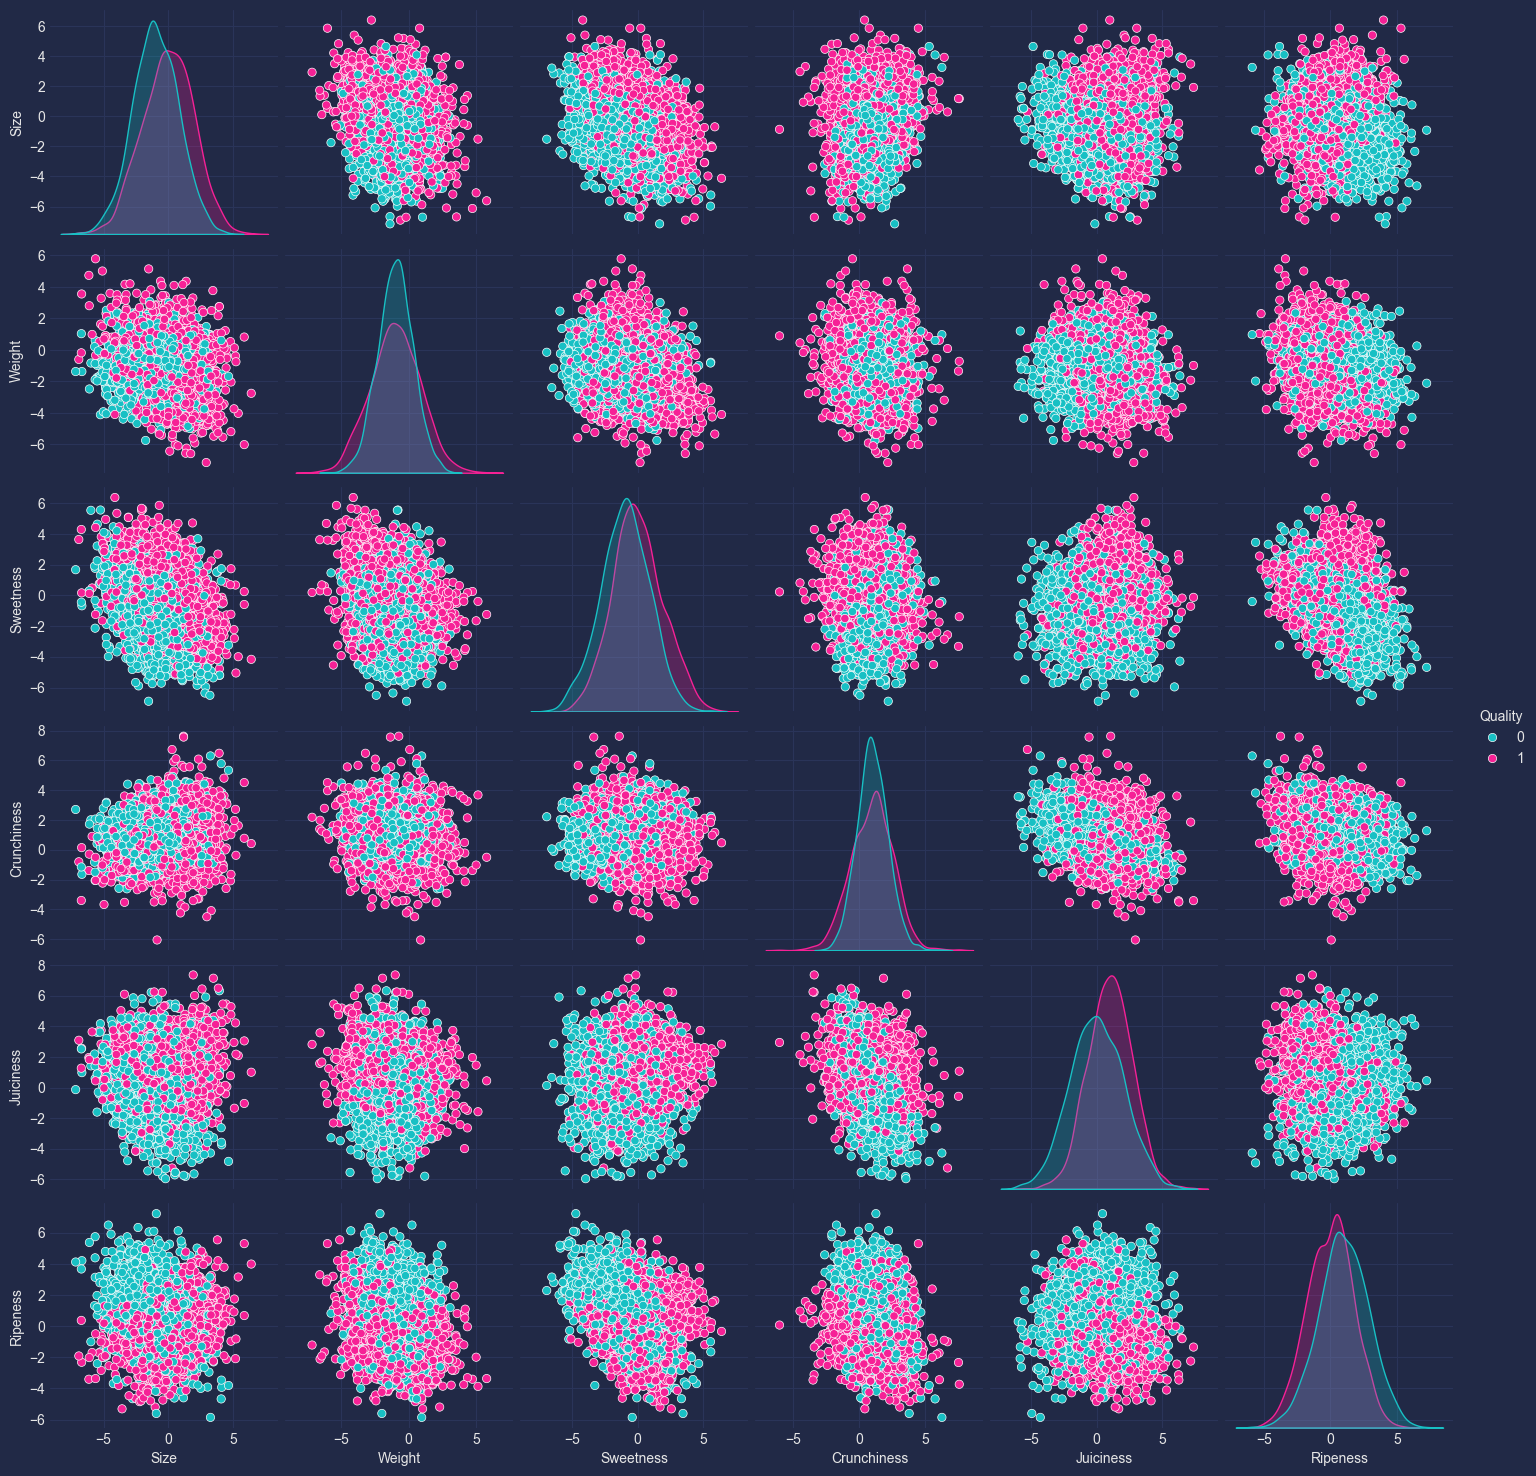

In [ ]:
import seaborn as sns

sns.pairplot(classification_data, hue='Quality')
plt.show()

---

#### Тепловая карта для визуализации корреляционной матрицы набора данных классификации

---

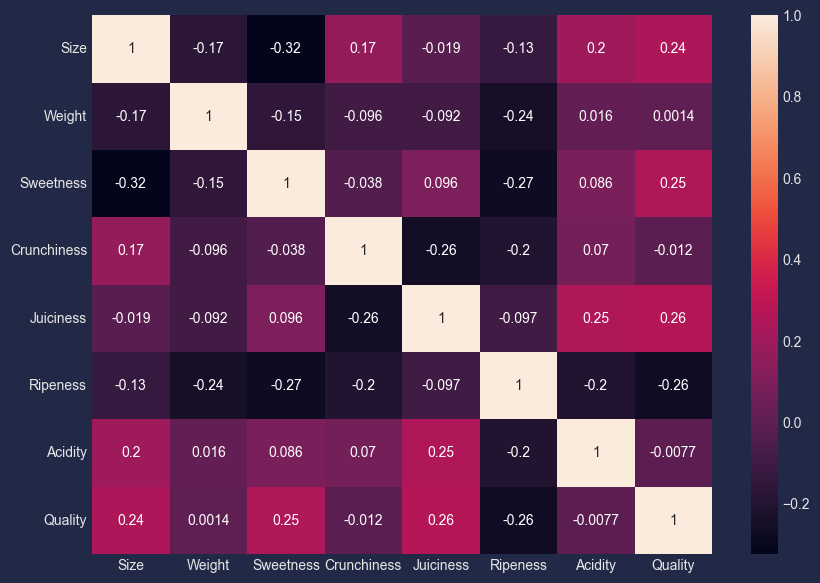

In [ ]:
plt.figure(figsize=(10, 7))

sns.heatmap(classification_data.corr(), annot=True)

plt.show()

---

#### Количество продаж авокадо в зависимости от даты и размера

---

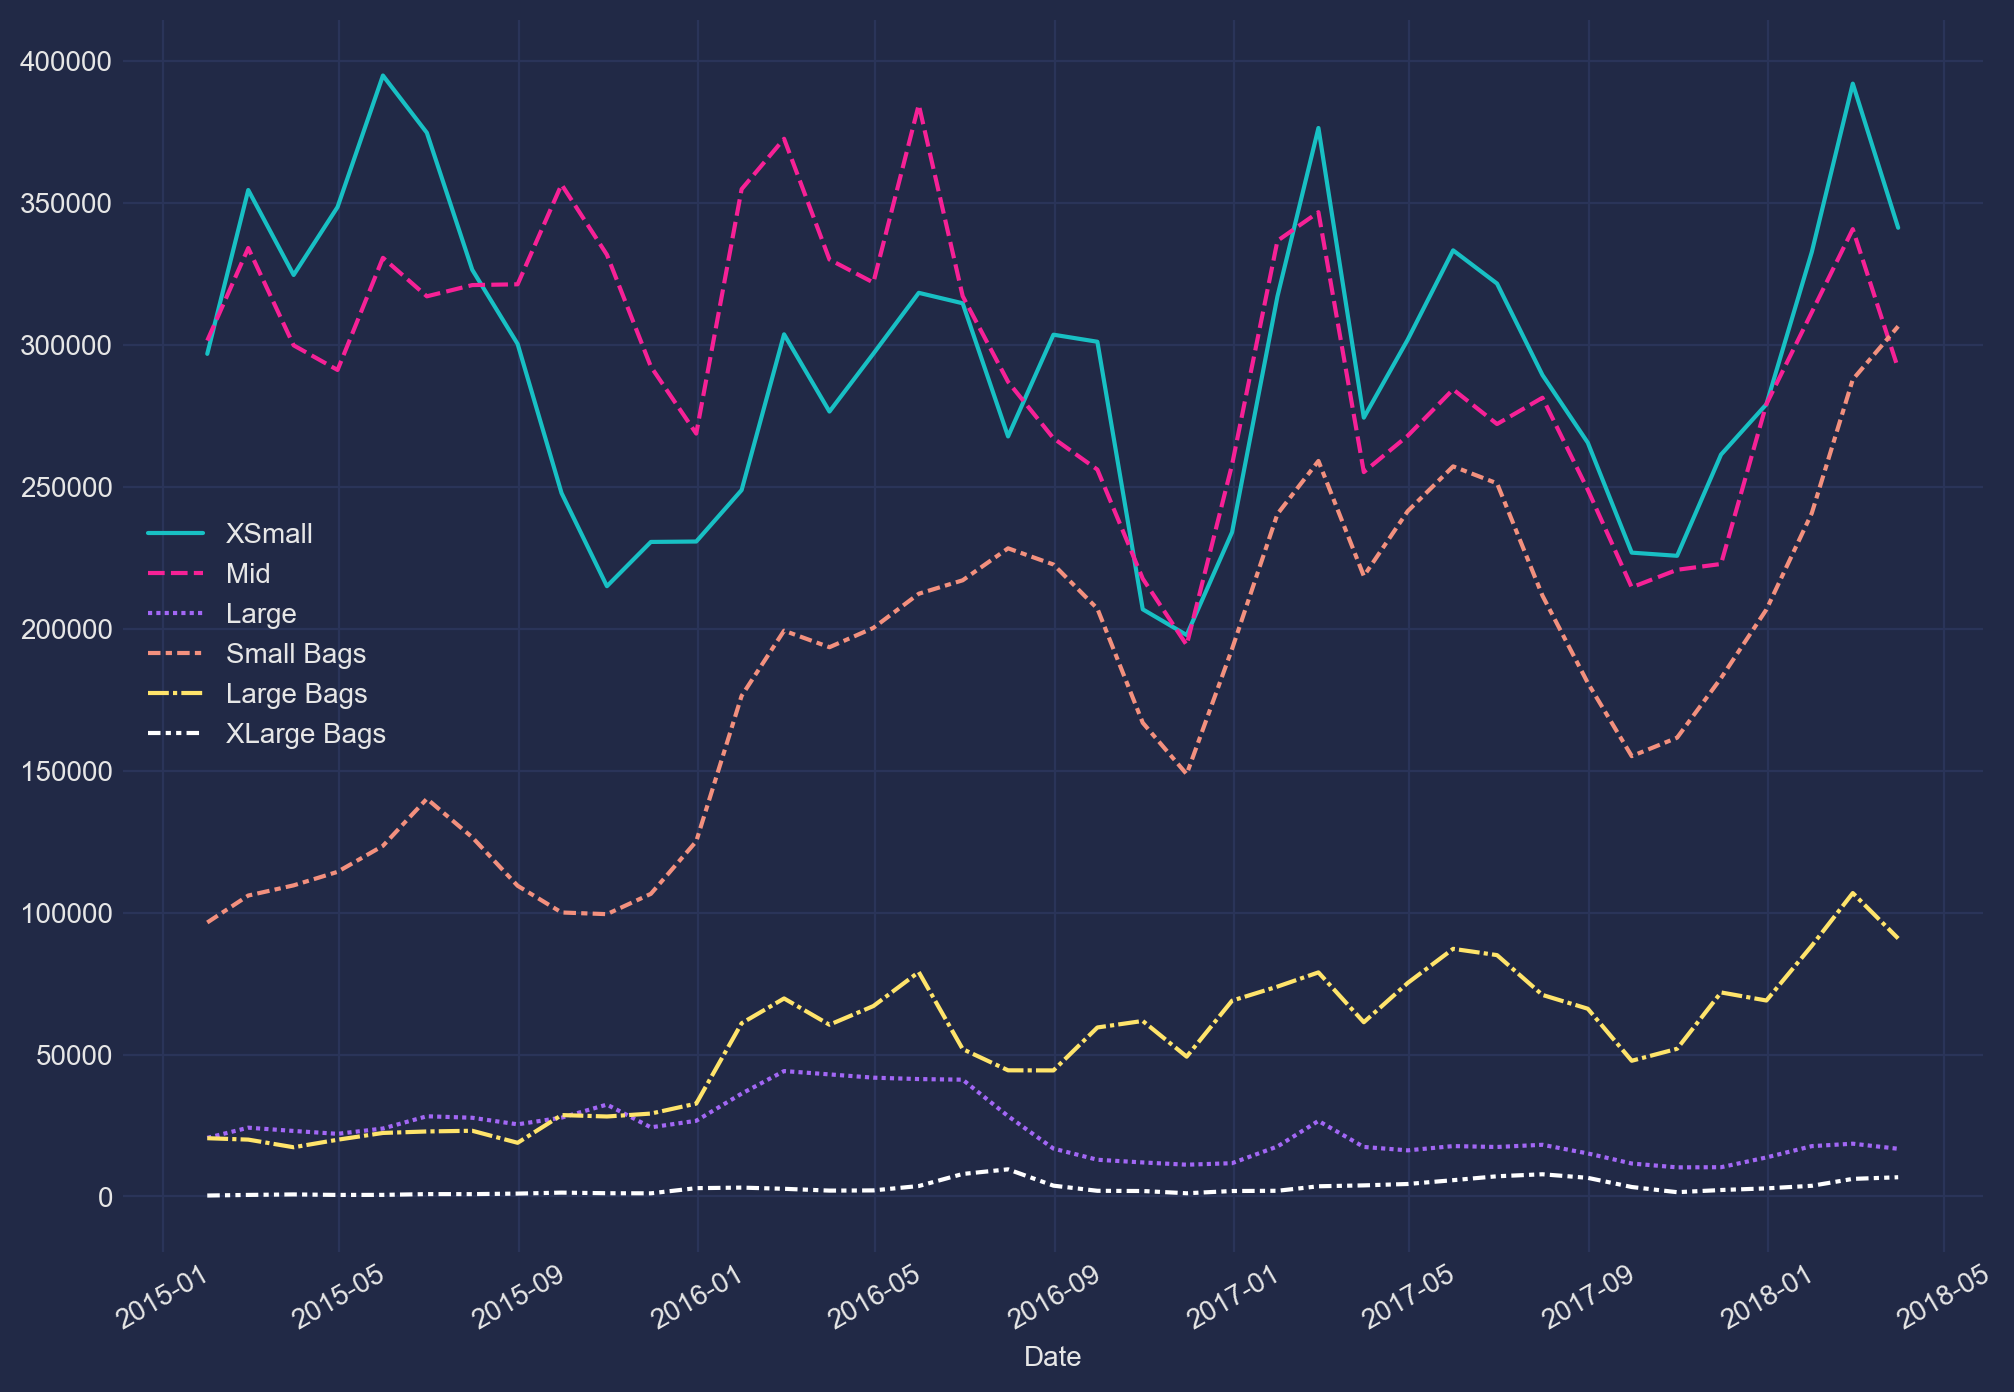

In [ ]:
df_G  = regression_data[['XSmall', 'Mid', 'Large', 'Small Bags', 'Large Bags', 'XLarge Bags', 'Date']].groupby(pd.Grouper(key = 'Date', freq = '1ME')).mean(numeric_only = True)

plt.figure(figsize=(12, 8), dpi=200)
sns.lineplot(data=df_G)
plt.xticks(rotation=30)
plt.show()

---

#### График распределения средней цены авокадо по годам

- Ось X (Average Price): Средняя цена авокадо за штуку.

- Ось Y (Density): Плотность распределения цен.

---

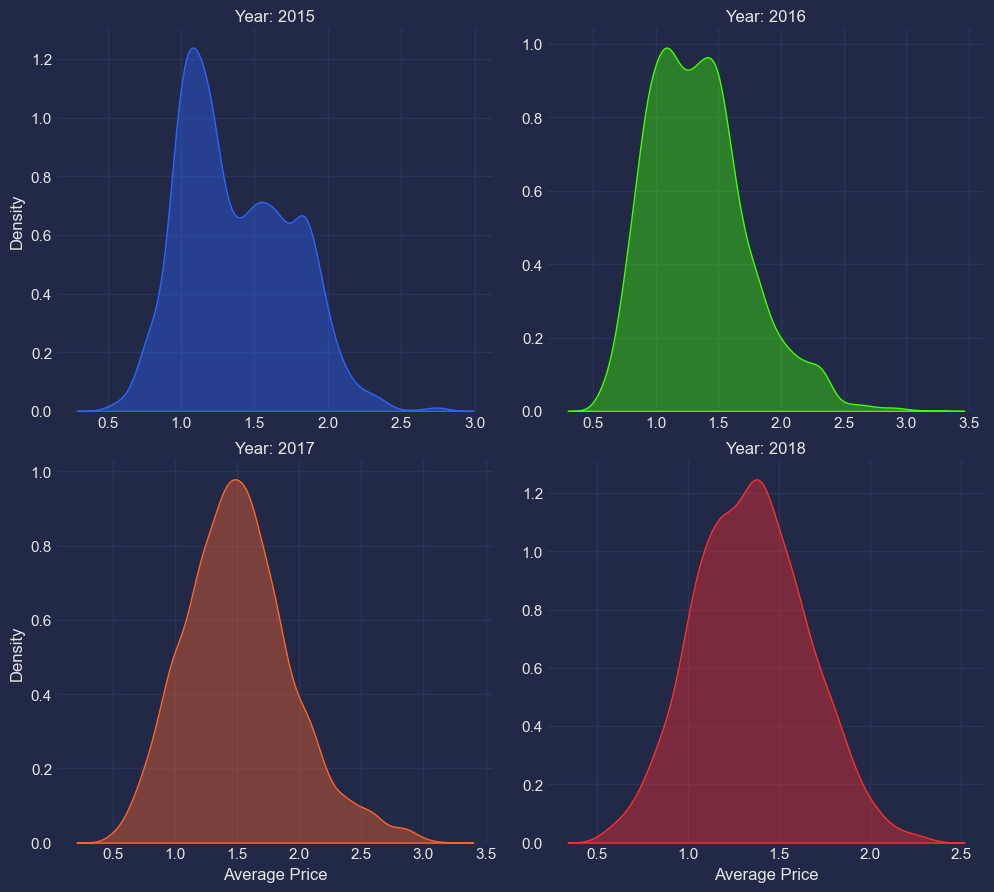

In [ ]:
seasonal_df = regression_data.copy()
seasonal_df['month_year'] = seasonal_df['Date'].dt.strftime('%Y-%m')
seasonal_df['month'] = seasonal_df['Date'].dt.month.astype(str).str.zfill(2)
seasonal_df['year'] = seasonal_df['Date'].dt.year

seasonal_df['monthabb'] = seasonal_df['month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))

seasonal_df['monthabb'] = pd.Categorical(seasonal_df['monthabb'], categories=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                                                           "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], ordered=True)

colors = ['#2E64FE', '#40FF00', '#FE642E', '#FE2E2E']

g = sns.FacetGrid(seasonal_df, col="year", col_wrap=2, height=5, sharex=False, sharey=False, palette=colors)

for i, ax in enumerate(g.axes.flat):
    sns.kdeplot(data=seasonal_df[seasonal_df['year'] == seasonal_df['year'].unique()[i]], 
                x='AveragePrice', fill=True, alpha=0.4, color=colors[i], ax=ax)

g.set_axis_labels('Average Price', 'Density')
g.set_titles('Year: {col_name}')


plt.subplots_adjust(top=0.85)
plt.show()

---

#### Тепловая карта для визуализации корреляционной матрицы набора данных регрессии

---

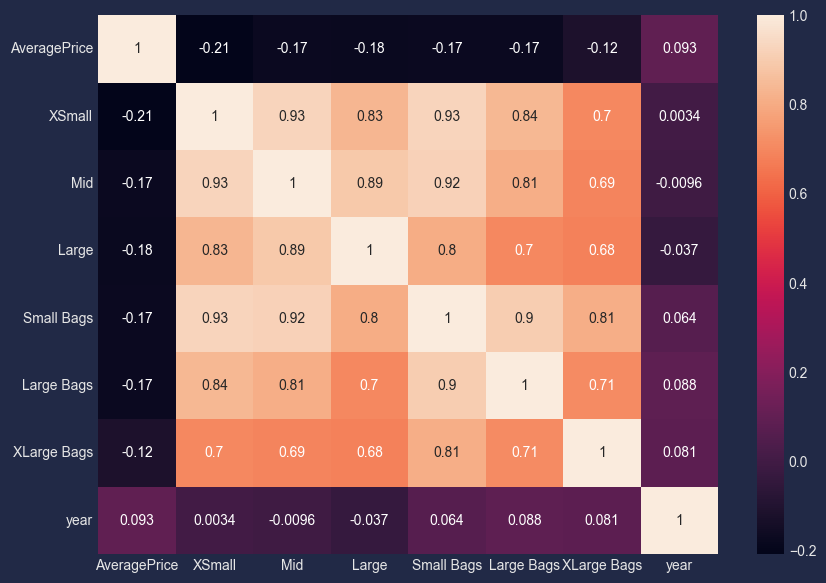

In [ ]:
corr = regression_data.corr(numeric_only=True)
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True)
plt.show()


Сделаем сплит

In [ ]:
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


#### Масштабирование данных

In [ ]:
scaler_class = StandardScaler()
X_class_train = scaler_class.fit_transform(X_class_train)
X_class_test = scaler_class.transform(X_class_test)

In [ ]:
scaler_reg = StandardScaler()
X_reg_train = scaler_reg.fit_transform(X_reg_train)
X_reg_test = scaler_reg.transform(X_reg_test)

---
#### Обучение базовых моделей KNN

---

In [ ]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_class_train, y_class_train)
y_class_pred = knn_classifier.predict(X_class_test)

In [ ]:
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_reg_train, y_reg_train)
y_reg_pred = knn_regressor.predict(X_reg_test)

#### Оценка качества базовых моделей

In [ ]:
print("Classification Metrics:")
print("Accuracy:", accuracy_score(y_class_test, y_class_pred))
print("F1-Score:", f1_score(y_class_test, y_class_pred))
print("ROC-AUC:", roc_auc_score(y_class_test, y_class_pred))

print("\nRegression Metrics:")
print("MSE:", mean_squared_error(y_reg_test, y_reg_pred))
print("MAE:", mean_absolute_error(y_reg_test, y_reg_pred))
print("R2:", r2_score(y_reg_test, y_reg_pred))

Classification Metrics:
Accuracy: 0.9025
F1-Score: 0.9027431421446384
ROC-AUC: 0.9025118906993168

Regression Metrics:
MSE: 0.025063274520547945
MAE: 0.10997698630136984
R2: 0.8440068617869089


---
#### Улучшение бейзлайна: подбор гиперпараметров

---

In [ ]:
param_grid_class = {'n_neighbors': [1, 3, 5, 7, 9], 'weights': ['uniform', 'distance']}
param_grid_reg = {'n_neighbors': [1, 3], 'weights': ['uniform', 'distance']}

GridSearch для классификации

In [ ]:
grid_class = GridSearchCV(KNeighborsClassifier(), param_grid_class, cv=5, scoring='accuracy')
grid_class.fit(X_class_train, y_class_train)
best_knn_classifier = grid_class.best_estimator_
y_class_pred_best = best_knn_classifier.predict(X_class_test)

GridSearch для регрессии

In [ ]:
grid_reg = GridSearchCV(KNeighborsRegressor(), param_grid_reg, cv=5, scoring='neg_mean_squared_error')
grid_reg.fit(X_reg_train, y_reg_train)
best_knn_regressor = grid_reg.best_estimator_
y_reg_pred_best = best_knn_regressor.predict(X_reg_test)

---
Оценка качества улучшенных моделей

---

In [ ]:
print("\nImproved Classification Metrics:")
print("Accuracy:", accuracy_score(y_class_test, y_class_pred_best))
print("F1-Score:", f1_score(y_class_test, y_class_pred_best))
print("ROC-AUC:", roc_auc_score(y_class_test, y_class_pred_best))

print("\nImproved Regression Metrics:")
print("MSE:", mean_squared_error(y_reg_test, y_reg_pred_best))
print("MAE:", mean_absolute_error(y_reg_test, y_reg_pred_best))
print("R2:", r2_score(y_reg_test, y_reg_pred_best))


Improved Classification Metrics:
Accuracy: 0.91
F1-Score: 0.9102244389027432
ROC-AUC: 0.91001193757461

Improved Regression Metrics:
MSE: 0.023700314917819862
MAE: 0.10428751690803818
R2: 0.8524898852447141


---

### Имплементация KNN

---

In [ ]:
from tqdm import tqdm
from joblib import Parallel, delayed

class KNNClassifier:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.sqrt(((self.X_train - x) ** 2).sum(axis=1))
            neighbors = np.argsort(distances)[:self.n_neighbors]
            labels = self.y_train[neighbors]
            predictions.append(np.bincount(labels).argmax())
        return np.array(predictions)

    def get_params(self, deep=True):
        # Возвращаем параметры в виде словаря
        return {"n_neighbors": self.n_neighbors}

    def set_params(self, **params):
        # Устанавливаем параметры
        for key, value in params.items():
            setattr(self, key, value)
        return self
    


class KNNRegressor:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        X = np.array(X)
        predictions = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)  # Вычисляем расстояния
            neighbors = np.argsort(distances)[:self.n_neighbors]  # Находим ближайших соседей
            predictions.append(self.y_train[neighbors].mean())  # Усредняем их значения
        return np.array(predictions)

    def get_params(self, deep=True):
        return {"n_neighbors": self.n_neighbors}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self


обучение и оценка собственных моделей и оценка качества собственных моделей

In [ ]:
# X_class_train = np.array(X_class_train)
# y_class_train = np.array(y_class_train)

# Имплементация KNN
knn_custom_classifier = KNNClassifier(n_neighbors=5)
knn_custom_classifier.fit(X_class_train, y_class_train)
y_class_pred_custom = knn_custom_classifier.predict(X_class_test)

knn_custom_regressor = KNNRegressor(n_neighbors=5)
knn_custom_regressor.fit(X_reg_train, y_reg_train)
y_reg_pred_custom = knn_custom_regressor.predict(X_reg_test)

# Оценка качества собственных моделей
print("\nCustom Implementation - Classification Metrics:")
print("Accuracy:", accuracy_score(y_class_test, y_class_pred_custom))
print("F1-Score:", f1_score(y_class_test, y_class_pred_custom))
print("ROC-AUC:", roc_auc_score(y_class_test, y_class_pred_custom))

print("\nCustom Implementation - Regression Metrics:")
print("MSE:", mean_squared_error(y_reg_test, y_reg_pred_custom))
print("MAE:", mean_absolute_error(y_reg_test, y_reg_pred_custom))
print("R2:", r2_score(y_reg_test, y_reg_pred_custom))



Custom Implementation - Classification Metrics:
Accuracy: 0.9025
F1-Score: 0.9027431421446384
ROC-AUC: 0.9025118906993168

Custom Implementation - Regression Metrics:
MSE: 0.025063274520547945
MAE: 0.10997698630136984
R2: 0.8440068617869089


---
#### Улучшение бейзлайна: подбор гиперпараметров

---

In [ ]:
grid_class_own = GridSearchCV(KNNClassifier(), param_grid_class, cv=5, scoring='accuracy')
grid_class_own.fit(X_class_train, y_class_train)
best_knn_classifier_own = grid_class_own.best_estimator_
y_class_pred_best_own = best_knn_classifier_own.predict(X_class_test)

In [ ]:
grid_reg_own = GridSearchCV(KNNRegressor(), param_grid_reg, cv=5, scoring='neg_mean_squared_error')
grid_reg_own.fit(X_reg_train, y_reg_train)
best_knn_regressor_own = grid_reg_own.best_estimator_
y_reg_pred_best_own = best_knn_regressor_own.predict(X_reg_test)    

---
Оценка качества улучшенных моделей

---

In [ ]:
print("\nImproved Classification Metrics:")
print("Accuracy:", accuracy_score(y_class_test, y_class_pred_best_own))
print("F1-Score:", f1_score(y_class_test, y_class_pred_best_own))
print("ROC-AUC:", roc_auc_score(y_class_test, y_class_pred_best_own))

print("\nImproved Regression Metrics:")
print("MSE:", mean_squared_error(y_reg_test, y_reg_pred_best_own))
print("MAE:", mean_absolute_error(y_reg_test, y_reg_pred_best_own))
print("R2:", r2_score(y_reg_test, y_reg_pred_best_own))


Improved Classification Metrics:
Accuracy: 0.91
F1-Score: 0.91
ROC-AUC: 0.910005687535547

Improved Regression Metrics:
MSE: 0.02461715372907154
MAE: 0.1070109589041096
R2: 0.8467835054464378


---
## Лабораторная работа №2 (Проведение исследований с логистической и линейной регрессией) 

---

---
#### Обучение базовых моделей LogisticRegression и LinearRegression

---

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression

lr_classifier = LogisticRegression()
lr_classifier.fit(X_class_train, y_class_train)
y_class_pred = lr_classifier.predict(X_class_test)

lr_regressor = LinearRegression()
lr_regressor.fit(X_reg_train, y_reg_train)
y_reg_pred = lr_regressor.predict(X_reg_test)

---
Оценка качества улучшенных моделей

---

In [ ]:
print("Linear Model - Classification Metrics:")
print("Accuracy:", accuracy_score(y_class_test, y_class_pred))
print("F1-Score:", f1_score(y_class_test, y_class_pred))
print("ROC-AUC:", roc_auc_score(y_class_test, y_class_pred))

print("\nLinear Model - Regression Metrics:")
print("MSE:", mean_squared_error(y_reg_test, y_reg_pred))
print("MAE:", mean_absolute_error(y_reg_test, y_reg_pred))
print("R2:", r2_score(y_reg_test, y_reg_pred))

Linear Model - Classification Metrics:
Accuracy: 0.75375
F1-Score: 0.7528230865746549
ROC-AUC: 0.7537453359083495

Linear Model - Regression Metrics:
MSE: 0.0729595945112036
MAE: 0.20342849465957072
R2: 0.5459014702477732


---
#### Улучшение бейзлайна: подбор гиперпараметров

---

In [ ]:
from sklearn.linear_model import Ridge

param_grid_lr_class = {'C': [0.001, 0.01, 0.1, 1, 50, 75, 110]}
grid_lr_class = GridSearchCV(LogisticRegression(), param_grid_lr_class, cv=5, scoring='accuracy')
grid_lr_class.fit(X_class_train, y_class_train)
best_lr_classifier = grid_lr_class.best_estimator_
y_class_pred_best = best_lr_classifier.predict(X_class_test)


param_grid_ridge = {'alpha': [0.1, 1, 10, 100]}  # alpha — коэффициент регуляризации
grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_ridge.fit(X_reg_train, y_reg_train)
best_ridge_regressor = grid_ridge.best_estimator_
y_reg_pred_best = best_ridge_regressor.predict(X_reg_test)


---
Оценка качества улучшенных моделей

---

In [ ]:
print("\nImproved Classification Metrics:")
print("Accuracy:", accuracy_score(y_class_test, y_class_pred_best))
print("F1-Score:", f1_score(y_class_test, y_class_pred_best))
print("ROC-AUC:", roc_auc_score(y_class_test, y_class_pred_best))

print("\nRidge Regression - Regression Metrics:")
print("MSE:", mean_squared_error(y_reg_test, y_reg_pred_best))
print("MAE:", mean_absolute_error(y_reg_test, y_reg_pred_best))
print("R2:", r2_score(y_reg_test, y_reg_pred_best))


Improved Classification Metrics:
Accuracy: 0.75375
F1-Score: 0.7528230865746549
ROC-AUC: 0.7537453359083495

Ridge Regression - Regression Metrics:
MSE: 0.07295842183071179
MAE: 0.20343620345991156
R2: 0.5459087689792255


---

### Имплементация LinearRegression и LogisticRegression

---

In [ ]:
class LinearRegressionCustom:
    def __init__(self, alpha=0.0):
        self.alpha = alpha

    def fit(self, X, y):

        self.X = np.hstack((np.ones((X.shape[0], 1)), np.array(X)))
        self.y = np.array(y)

        regularization = self.alpha * np.eye(self.X.shape[1])
        regularization[0, 0] = 0  

        self.weights = np.linalg.inv(self.X.T @ self.X + regularization) @ self.X.T @ self.y

    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), np.array(X)))
        return X @ self.weights

    def get_params(self, deep=True):
        return {"alpha": self.alpha}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

class LogisticRegression_my:
    def __init__(self, learning_rate=0.1, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.X = np.hstack((np.ones((X.shape[0], 1)), np.array(X)))
        self.y = np.array(y)
        self.weights = np.zeros(self.X.shape[1])

        for _ in range(self.n_iter):
            predictions = self.sigmoid(self.X @ self.weights)
            gradient = self.X.T @ (predictions - self.y) / len(self.y)
            self.weights -= self.learning_rate * gradient

    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), np.array(X)))
        return (self.sigmoid(X @ self.weights) >= 0.5).astype(int)

    def get_params(self, deep=True):
        return {"learning_rate": self.learning_rate, "n_iter": self.n_iter}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self


In [ ]:
Liner_classifier = LogisticRegression_my()
Liner_classifier.fit(X_class_train, y_class_train)
y_class_pred_Liner = Liner_classifier.predict(X_class_test)

knn_regressor = LinearRegression()
knn_regressor.fit(X_reg_train, y_reg_train)
y_reg_pred = knn_regressor.predict(X_reg_test)

Training Logistic Regression: 100%|██████████| 1000/1000 [00:00<00:00, 6224.30it/s]


---
Оценка качества улучшенных моделей

---

In [ ]:
print("Classification Metrics:")
print("Accuracy:", accuracy_score(y_class_test, y_class_pred_Liner))
print("F1-Score:", f1_score(y_class_test, y_class_pred_Liner))
print("ROC-AUC:", roc_auc_score(y_class_test, y_class_pred_Liner))


print("\nRegression Metrics:")
print("MSE:", mean_squared_error(y_reg_test, y_reg_pred))
print("MAE:", mean_absolute_error(y_reg_test, y_reg_pred))
print("R2:", r2_score(y_reg_test, y_reg_pred))

Classification Metrics:
Accuracy: 0.75375
F1-Score: 0.7528230865746549
ROC-AUC: 0.7537453359083495

Regression Metrics:
MSE: 0.07295959451120362
MAE: 0.2034284946595708
R2: 0.5459014702477731


---
#### Улучшение бейзлайна: подбор гиперпараметров

---

In [ ]:
param_grid_lr_class = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_iter': [500, 1000, 2000]
}
grid_lr_class = GridSearchCV(LogisticRegression_my(), param_grid_lr_class, cv=5, scoring='accuracy')
grid_lr_class.fit(X_class_train, y_class_train)
best_lr_classifier = grid_lr_class.best_estimator_
y_class_pred_best = best_lr_classifier.predict(X_class_test)

In [ ]:
param_grid = {'alpha': [0.0, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LinearRegressionCustom(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_reg_train, y_reg_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_reg_test)

---
Оценка качества улучшенных моделей

---

In [ ]:
print("\nImproved Classification Metrics:")
print("Accuracy:", accuracy_score(y_class_test, y_class_pred_best))
print("F1-Score:", f1_score(y_class_test, y_class_pred_best))
print("ROC-AUC:", roc_auc_score(y_class_test, y_class_pred_best))

print("\nRidge Regression - Regression Metrics:")
print("MSE:", mean_squared_error(y_reg_test, y_reg_pred_best))
print("MAE:", mean_absolute_error(y_reg_test, y_reg_pred_best))
print("R2:", r2_score(y_reg_test, y_reg_pred_best))


Improved Classification Metrics:
Accuracy: 0.75375
F1-Score: 0.753441802252816
ROC-AUC: 0.7537515859474122

Ridge Regression - Regression Metrics:
MSE: 0.07295842183071179
MAE: 0.20343620345991156
R2: 0.5459087689792255


---
## Лабораторная работа №3 (Проведение исследований с решающим деревом) 

---

---
#### Обучение базовых моделей DecisionTree

---

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_class_train, y_class_train)
y_class_pred = dt_classifier.predict(X_class_test)

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_reg_train, y_reg_train)
y_reg_pred = dt_regressor.predict(X_reg_test)

---
Оценка качества базовых моделей

---

In [ ]:
print("Decision Tree - Classification Metrics:")
print("Accuracy:", accuracy_score(y_class_test, y_class_pred))
print("F1-Score:", f1_score(y_class_test, y_class_pred))
print("ROC-AUC:", roc_auc_score(y_class_test, y_class_pred))

print("\nDecision Tree - Regression Metrics:")
print("MSE:", mean_squared_error(y_reg_test, y_reg_pred))
print("MAE:", mean_absolute_error(y_reg_test, y_reg_pred))
print("R2:", r2_score(y_reg_test, y_reg_pred))

Decision Tree - Classification Metrics:
Accuracy: 0.80375
F1-Score: 0.8030112923462986
ROC-AUC: 0.8037456484103026

Decision Tree - Regression Metrics:
MSE: 0.04871219178082192
MAE: 0.14312602739726027
R2: 0.6968166446527743


---
#### Улучшение бейзлайна: подбор гиперпараметров

---

In [ ]:
# Grid Search for Decision Tree
param_grid_dt_class = {'max_depth': [3, 5, 10]}
grid_dt_class = GridSearchCV(DecisionTreeClassifier(), param_grid_dt_class, cv=5, scoring='accuracy')
grid_dt_class.fit(X_class_train, y_class_train)
best_dt_classifier = grid_dt_class.best_estimator_
y_class_pred_best = best_dt_classifier.predict(X_class_test)

param_grid_dt_reg = {'max_depth': [3, 5, 10, 15]}
grid_dt_reg = GridSearchCV(DecisionTreeRegressor(), param_grid_dt_reg, cv=5, scoring='neg_mean_squared_error')
grid_dt_reg.fit(X_reg_train, y_reg_train)
best_dt_regressor = grid_dt_reg.best_estimator_
y_reg_pred_best = best_dt_regressor.predict(X_reg_test)

---
Оценка качества улучшенных моделей

---

In [ ]:
print("Decision Tree - Classification Metrics:")
print("Accuracy:", accuracy_score(y_class_test, y_class_pred_best))
print("F1-Score:", f1_score(y_class_test, y_class_pred_best))
print("ROC-AUC:", roc_auc_score(y_class_test, y_class_pred_best))

print("\nDecision Tree - Regression Metrics:")
print("MSE:", mean_squared_error(y_reg_test, y_reg_pred_best))
print("MAE:", mean_absolute_error(y_reg_test, y_reg_pred_best))
print("R2:", r2_score(y_reg_test, y_reg_pred_best))

Decision Tree - Classification Metrics:
Accuracy: 0.7975
F1-Score: 0.7985074626865671
ROC-AUC: 0.797517484484278

Decision Tree - Regression Metrics:
MSE: 0.04648988017448138
MAE: 0.14660848210785643
R2: 0.7106482515833142


---

### Имплементация DecisionTree

---

In [ ]:
class DecisionTreeClassification:
    def __init__(self, max_depth=3, n_bins=10):
        self.max_depth = max_depth
        self.n_bins = n_bins

    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)

        # Квантование признаков
        self.bins = [
            np.linspace(np.min(self.X[:, i]), np.max(self.X[:, i]), self.n_bins + 1)[1:-1]
            for i in range(self.X.shape[1])
        ]
        self.X_binned = np.array([np.digitize(self.X[:, i], self.bins[i]) for i in range(self.X.shape[1])]).T
        
        self.tree = self._build_tree(self.X_binned, self.y, depth=0)

    def _split(self, X, y, feature, threshold):
        left_mask = X[:, feature] < threshold
        right_mask = ~left_mask
        return X[left_mask], X[right_mask], y[left_mask], y[right_mask]

    def _gini(self, y):
        classes = np.unique(y)
        gini = 1.0
        for cls in classes:
            p = np.sum(y == cls) / len(y)
            gini -= p ** 2
        return gini

    def _best_split(self, X, y):
        best_feature, best_threshold, best_gini = None, None, float('inf')
        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                _, _, y_left, y_right = self._split(X, y, feature, threshold)
                if len(y_left) == 0 or len(y_right) == 0:
                    continue
                gini_split = (
                    len(y_left) / len(y) * self._gini(y_left) +
                    len(y_right) / len(y) * self._gini(y_right)
                )
                if gini_split < best_gini:
                    best_feature, best_threshold, best_gini = feature, threshold, gini_split
        return best_feature, best_threshold

    def _build_tree(self, X, y, depth):
        if len(np.unique(y)) == 1 or depth >= self.max_depth:
            return {'type': 'leaf', 'class': np.bincount(y).argmax()}

        feature, threshold = self._best_split(X, y)
        if feature is None:
            return {'type': 'leaf', 'class': np.bincount(y).argmax()}

        X_left, X_right, y_left, y_right = self._split(X, y, feature, threshold)
        return {
            'type': 'node',
            'feature': feature,
            'threshold': threshold,
            'left': self._build_tree(X_left, y_left, depth + 1),
            'right': self._build_tree(X_right, y_right, depth + 1),
        }

    def _predict_single(self, x, node):
        if node['type'] == 'leaf':
            return node['class']
        if x[node['feature']] < node['threshold']:
            return self._predict_single(x, node['left'])
        else:
            return self._predict_single(x, node['right'])

    def predict(self, X):
        X = np.array(X)
        X_binned = np.array([np.digitize(X[:, i], self.bins[i]) for i in range(X.shape[1])]).T
        return np.array([self._predict_single(x, self.tree) for x in X_binned])
    
    def get_params(self, deep=True):
        return {"max_depth": self.max_depth}

    # Добавляем метод set_params
    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self
    
class DecisionTreeRegressor:
    def __init__(self, max_depth=3, n_bins=10):
        self.max_depth = max_depth
        self.n_bins = n_bins

    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)
        
        # Квантование признаков
        self.bins = [
            np.linspace(np.min(self.X[:, i]), np.max(self.X[:, i]), self.n_bins + 1)[1:-1]
            for i in range(self.X.shape[1])
        ]
        self.X_binned = np.array([np.digitize(self.X[:, i], self.bins[i]) for i in range(self.X.shape[1])]).T
        
        self.tree = self._build_tree(self.X_binned, self.y, depth=0)

    def _split(self, X, y, feature, threshold):
        left_mask = X[:, feature] < threshold
        right_mask = ~left_mask
        return X[left_mask], X[right_mask], y[left_mask], y[right_mask]

    def _variance(self, y):
        return np.var(y)

    def _best_split(self, X, y):
        best_feature, best_threshold, best_variance = None, None, float('inf')
        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                _, _, y_left, y_right = self._split(X, y, feature, threshold)
                if len(y_left) == 0 or len(y_right) == 0:
                    continue
                variance_split = (
                    len(y_left) / len(y) * self._variance(y_left) +
                    len(y_right) / len(y) * self._variance(y_right)
                )
                if variance_split < best_variance:
                    best_feature, best_threshold, best_variance = feature, threshold, variance_split
        return best_feature, best_threshold

    def _build_tree(self, X, y, depth):
        if len(y) == 1 or depth >= self.max_depth or np.var(y) == 0:
            return {'type': 'leaf', 'value': np.mean(y)}

        feature, threshold = self._best_split(X, y)
        if feature is None:
            return {'type': 'leaf', 'value': np.mean(y)}

        X_left, X_right, y_left, y_right = self._split(X, y, feature, threshold)
        return {
            'type': 'node',
            'feature': feature,
            'threshold': threshold,
            'left': self._build_tree(X_left, y_left, depth + 1),
            'right': self._build_tree(X_right, y_right, depth + 1),
        }

    def _predict_single(self, x, node):
        if node['type'] == 'leaf':
            return node['value']
        if x[node['feature']] < node['threshold']:
            return self._predict_single(x, node['left'])
        else:
            return self._predict_single(x, node['right'])

    def predict(self, X):
        X = np.array(X)
        X_binned = np.array([np.digitize(X[:, i], self.bins[i]) for i in range(X.shape[1])]).T
        return np.array([self._predict_single(x, self.tree) for x in X_binned])
    
    # Добавляем метод get_params
    def get_params(self, deep=True):
        return {"max_depth": self.max_depth, "n_bins": self.n_bins}

    # Добавляем метод set_params
    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self



---
#### Улучшение бейзлайна: подбор гиперпараметров

---

In [ ]:
param_grid_dt_class = {'max_depth': [3, 5, 10]}
grid_dt_class = GridSearchCV(DecisionTreeClassification(), param_grid_dt_class, cv=5, scoring='accuracy')
grid_dt_class.fit(X_class_train, y_class_train)
best_dt_classifier = grid_dt_class.best_estimator_
y_class_pred_best = best_dt_classifier.predict(X_class_test)

param_grid_dt_reg = {'max_depth': [3, 5, 10], 'n_bins': [5, 10, 15]}
grid_dt_reg = GridSearchCV(DecisionTreeRegressor(), param_grid_dt_reg, cv=5, scoring='neg_mean_squared_error')
grid_dt_reg.fit(X_reg_train, y_reg_train)
best_dt_regressor = grid_dt_reg.best_estimator_
y_reg_pred_best = best_dt_regressor.predict(X_reg_test)

---
Оценка качества улучшенных моделей

---

In [ ]:
print("Decision Tree - Classification Metrics:")
print("Accuracy:", accuracy_score(y_class_test, y_class_pred_best))
print("F1-Score:", f1_score(y_class_test, y_class_pred_best))
print("ROC-AUC:", roc_auc_score(y_class_test, y_class_pred_best))

print("\nDecision Tree - Regression Metrics:")
print("MSE:", mean_squared_error(y_reg_test, y_reg_pred_best))
print("MAE:", mean_absolute_error(y_reg_test, y_reg_pred_best))
print("R2:", r2_score(y_reg_test, y_reg_pred_best))

Decision Tree - Classification Metrics:
Accuracy: 0.8075
F1-Score: 0.8045685279187818
ROC-AUC: 0.8074675466721668

Decision Tree - Regression Metrics:
MSE: 0.0742328907713972
MAE: 0.20248796934854704
R2: 0.5379765089926207


---
## Лабораторная работа №4 (Проведение исследований со случайным лесом) 

---

---
#### Обучение базовых моделей RandomForest

---

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_class_train, y_class_train)
y_class_pred = rf_classifier.predict(X_class_test)

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_reg_train, y_reg_train)
y_reg_pred = rf_regressor.predict(X_reg_test)

---
Оценка качества базовых моделей

---

In [ ]:
print("Random Forest - Classification Metrics:")
print("Accuracy:", accuracy_score(y_class_test, y_class_pred))
print("F1-Score:", f1_score(y_class_test, y_class_pred))
print("ROC-AUC:", roc_auc_score(y_class_test, y_class_pred))

print("\nRandom Forest - Regression Metrics:")
print("MSE:", mean_squared_error(y_reg_test, y_reg_pred))
print("MAE:", mean_absolute_error(y_reg_test, y_reg_pred))
print("R2:", r2_score(y_reg_test, y_reg_pred))

Random Forest - Classification Metrics:
Accuracy: 0.9025
F1-Score: 0.9027431421446384
ROC-AUC: 0.9025118906993168

Random Forest - Regression Metrics:
MSE: 0.023179138580821913
MAE: 0.10725221917808217
R2: 0.8557336725760167


---
#### Улучшение бейзлайна: подбор гиперпараметров

---

In [ ]:
param_grid_rf_class = {'n_estimators': [50, 100], 'max_depth': [10, 15]}
grid_rf_class = GridSearchCV(RandomForestClassifier(), param_grid_rf_class, cv=5, scoring='accuracy')
grid_rf_class.fit(X_class_train, y_class_train)
best_rf_classifier = grid_rf_class.best_estimator_
y_class_pred_best = best_rf_classifier.predict(X_class_test)

param_grid_rf_reg = {'n_estimators': [50, 100], 'max_depth': [5, 10, 15, 20]}
grid_rf_reg = GridSearchCV(RandomForestRegressor(), param_grid_rf_reg, cv=5, scoring='neg_mean_squared_error')
grid_rf_reg.fit(X_reg_train, y_reg_train)
best_rf_regressor = grid_rf_reg.best_estimator_
y_reg_pred_best = best_rf_regressor.predict(X_reg_test)


---
Оценка качества улучшенных моделей

---

In [ ]:
print("Random Forest Grid- Classification Metrics:")
print("Accuracy:", accuracy_score(y_class_test, y_class_pred_best))
print("F1-Score:", f1_score(y_class_test, y_class_pred_best))
print("ROC-AUC:", roc_auc_score(y_class_test, y_class_pred_best))

print("\nRandom Forest Grid - Regression Metrics:")
print("MSE:", mean_squared_error(y_reg_test, y_reg_pred_best))
print("MAE:", mean_absolute_error(y_reg_test, y_reg_pred_best))
print("R2:", r2_score(y_reg_test, y_reg_pred_best))

Random Forest Grid- Classification Metrics:
Accuracy: 0.905
F1-Score: 0.9061728395061729
ROC-AUC: 0.9050369064806655

Random Forest Grid - Regression Metrics:
MSE: 0.024290220425229877
MAE: 0.11029546991861269
R2: 0.8488183294280697


---

### Имплементация RandomForestClass и RandomForestReg

---

In [ ]:
class RandomForestClass:
    def __init__(self, n_trees=10, max_depth=3, sample_size=0.8):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.sample_size = sample_size
        self.trees = []

    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)
        for _ in tqdm(range(self.n_trees), desc="Training Trees"):
            indices = np.random.choice(len(self.X), int(len(self.X) * self.sample_size), replace=True)
            X_sample, y_sample = self.X[indices], self.y[indices]
            tree = DecisionTreeClassification(max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)
    
    def get_params(self, deep=True):
        return {"n_trees": self.n_trees, "max_depth": self.max_depth, "sample_size": self.sample_size}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self
    

class RandomForestReg:
    def __init__(self, n_trees=10, max_depth=3, sample_size=0.8):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.sample_size = sample_size
        self.trees = []

    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)
        for _ in tqdm(range(self.n_trees), desc="Training Trees"):
            indices = np.random.choice(len(self.X), int(len(self.X) * self.sample_size), replace=True)
            X_sample, y_sample = self.X[indices], self.y[indices]
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)  
    
    def get_params(self, deep=True):
        return {"n_trees": self.n_trees, "max_depth": self.max_depth, "sample_size": self.sample_size}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

---
#### Улучшение бейзлайна: подбор гиперпараметров

---

In [ ]:
param_grid_rf_class = {'n_trees': [5, 10, 15], 'max_depth': [10, 15], 'sample_size': [0.5, 0.8, 1]}
grid_rf_class = GridSearchCV(RandomForestClass(), param_grid_rf_class, cv=5, scoring='accuracy')
grid_rf_class.fit(X_class_train, y_class_train)
best_rf_classifier = grid_rf_class.best_estimator_
y_class_pred_best = best_rf_classifier.predict(X_class_test)

param_grid_rf_reg = {'n_trees': [5, 10, 15], 'max_depth': [10, 15], 'sample_size': [0.5, 0.8, 1]}
grid_rf_reg = GridSearchCV(RandomForestReg(), param_grid_rf_reg, cv=5, scoring='neg_mean_squared_error')
grid_rf_reg.fit(X_reg_train, y_reg_train)
best_rf_regressor = grid_rf_reg.best_estimator_
y_reg_pred_best = best_rf_regressor.predict(X_reg_test)

Training Trees: 100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


---
Оценка качества улучшенных моделей

---

In [ ]:
print("Random Forest Grid- Classification Metrics:")
print("Accuracy:", accuracy_score(y_class_test, y_class_pred_best))
print("F1-Score:", f1_score(y_class_test, y_class_pred_best))
print("ROC-AUC:", roc_auc_score(y_class_test, y_class_pred_best))

print("\nRandom Forest Grid - Regression Metrics:")
print("MSE:", mean_squared_error(y_reg_test, y_reg_pred_best))
print("MAE:", mean_absolute_error(y_reg_test, y_reg_pred_best))
print("R2:", r2_score(y_reg_test, y_reg_pred_best))

Random Forest Grid- Classification Metrics:
Accuracy: 0.8875
F1-Score: 0.8872180451127819
ROC-AUC: 0.8874992968706054

Random Forest Grid - Regression Metrics:
MSE: 0.06505515294884823
MAE: 0.1869670886854084
R2: 0.5950984993160582


---
## Лабораторная работа №5 (Проведение исследований с градиентным бустингом) +  выводы

---

---
#### Обучение базовых моделей градиентного бустинга

---

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_class_train, y_class_train)
y_class_pred = gb_classifier.predict(X_class_test)

gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_reg_train, y_reg_train)
y_reg_pred = gb_regressor.predict(X_reg_test)


---
Оценка качества базовых моделей

---

In [ ]:
print("Gradient Boosting - Classification Metrics:")
print("Accuracy:", accuracy_score(y_class_test, y_class_pred))
print("F1-Score:", f1_score(y_class_test, y_class_pred))
print("ROC-AUC:", roc_auc_score(y_class_test, y_class_pred))

print("\nGradient Boosting - Regression Metrics:")
print("MSE:", mean_squared_error(y_reg_test, y_reg_pred))
print("MAE:", mean_absolute_error(y_reg_test, y_reg_pred))
print("R2:", r2_score(y_reg_test, y_reg_pred))


Gradient Boosting - Classification Metrics:
Accuracy: 0.87
F1-Score: 0.8696741854636592
ROC-AUC: 0.8699991874949218

Gradient Boosting - Regression Metrics:
MSE: 0.0561772454457984
MAE: 0.17718117899846414
R2: 0.6503543538944732


---
#### Улучшение бейзлайна: подбор гиперпараметров

---

In [ ]:
param_grid_gb_class = {'n_estimators': [50, 100], 'max_depth': [3, 5], 'learning_rate': [0.1, 0.01]}
grid_gb_class = GridSearchCV(GradientBoostingClassifier(), param_grid_gb_class, cv=5, scoring='accuracy')
grid_gb_class.fit(X_class_train, y_class_train)
best_gb_classifier = grid_gb_class.best_estimator_
y_class_pred_best = best_gb_classifier.predict(X_class_test)

param_grid_gb_reg = {'n_estimators': [50, 100], 'max_depth': [3, 5], 'learning_rate': [0.1, 0.01]}
grid_gb_reg = GridSearchCV(GradientBoostingRegressor(), param_grid_gb_reg, cv=5, scoring='neg_mean_squared_error')
grid_gb_reg.fit(X_reg_train, y_reg_train)
best_gb_regressor = grid_gb_reg.best_estimator_
y_reg_pred_best = best_gb_regressor.predict(X_reg_test)


---
Оценка качества улучшенных моделей

---

In [ ]:
print("Gradient Boosting Grid - Classification Metrics:")
print("Accuracy:", accuracy_score(y_class_test, y_class_pred_best))
print("F1-Score:", f1_score(y_class_test, y_class_pred_best))
print("ROC-AUC:", roc_auc_score(y_class_test, y_class_pred_best))

print("\nGradient Boosting Grid - Regression Metrics:")
print("MSE:", mean_squared_error(y_reg_test, y_reg_pred_best))
print("MAE:", mean_absolute_error(y_reg_test, y_reg_pred_best))
print("R2:", r2_score(y_reg_test, y_reg_pred_best))

Gradient Boosting Grid - Classification Metrics:
Accuracy: 0.905
F1-Score: 0.9057071960297767
ROC-AUC: 0.90502440640254

Gradient Boosting Grid - Regression Metrics:
MSE: 0.040294839789169284
MAE: 0.14868895107249222
R2: 0.7492060142678904


---

### Имплементация GradientBoostingClass и GradientBoostingReg

---

In [ ]:
class GradientBoostingClass:
    def __init__(self, n_trees=10, max_depth=3, sample_size=0.8, learning_rate=0.1):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.sample_size = sample_size
        self.learning_rate = learning_rate
        self.trees = []

    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)
        
        y_pred = np.full_like(y, 0.5, dtype=float)
        
        for _ in tqdm(range(self.n_trees), desc="Training Trees Class"):
            indices = np.random.choice(len(self.X), int(len(self.X) * self.sample_size), replace=True)
            X_sample, y_sample = self.X[indices], self.y[indices]
            
            residuals = y_sample - y_pred[indices]
            
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X_sample, residuals) 
            
            tree_predictions = tree.predict(X_sample)
            
            y_pred[indices] += self.learning_rate * tree_predictions
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full(X.shape[0], 0.5, dtype=float)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        
        return np.where(y_pred > 0.5, 1, 0) 

    def get_params(self, deep=True):
        return {"n_trees": self.n_trees, "max_depth": self.max_depth, "sample_size": self.sample_size, "learning_rate": self.learning_rate}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

class GradientBoostingReg:
    def __init__(self, n_trees=10, max_depth=3, sample_size=0.8, learning_rate=0.1):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.sample_size = sample_size
        self.learning_rate = learning_rate
        self.trees = []

    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)

        y_pred = np.median(y) * np.ones_like(y)
        
        for _ in tqdm(range(self.n_trees), desc="Training Trees Reg"):
            indices = np.random.choice(len(self.X), int(len(self.X) * self.sample_size), replace=True)
            X_sample, y_sample = self.X[indices], self.y[indices]
            
            residuals = y_sample - y_pred[indices]
        
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X_sample, residuals)
            
            tree_predictions = tree.predict(X_sample)
            
            y_pred[indices] += self.learning_rate * tree_predictions
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.median(self.y) * np.ones(X.shape[0])  # Начальное значение предсказания
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred

    def get_params(self, deep=True):
        return {"n_trees": self.n_trees, "max_depth": self.max_depth, "sample_size": self.sample_size, "learning_rate": self.learning_rate}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self



In [ ]:
gb_classifier = GradientBoostingClass()
gb_classifier.fit(X_class_train, y_class_train)
y_class_pred = gb_classifier.predict(X_class_test)

gb_reg = GradientBoostingReg()
gb_reg.fit(X_reg_train, y_reg_train)
y_reg_pred = gb_reg.predict(X_reg_test)

Training Trees Reg: 100%|██████████| 10/10 [00:08<00:00,  1.16it/s]


---
Оценка качества базовых моделей

---

In [ ]:
print("Gradient Boosting - Classification Metrics:")
print("Accuracy:", accuracy_score(y_class_test, y_class_pred))
print("F1-Score:", f1_score(y_class_test, y_class_pred))
print("ROC-AUC:", roc_auc_score(y_class_test, y_class_pred))


print("\nGradient Boosting - Regression Metrics:")
print("MSE:", mean_squared_error(y_reg_test, y_reg_pred))
print("MAE:", mean_absolute_error(y_reg_test, y_reg_pred))
print("R2:", r2_score(y_reg_test, y_reg_pred))

Gradient Boosting - Classification Metrics:
Accuracy: 0.78125
F1-Score: 0.7919143876337693
ROC-AUC: 0.7813830086438041

Gradient Boosting - Regression Metrics:
MSE: 0.09161733194501476
MAE: 0.2340835150169962
R2: 0.4297762204576896


---
#### Улучшение бейзлайна: подбор гиперпараметров

---

In [ ]:
param_grid_dt_class = {'n_trees': [5, 10], 'max_depth': [3, 5], 'learning_rate': [0.1, 0.01]}
grid_dt_class = GridSearchCV(GradientBoostingClass(), param_grid_dt_class, cv=5, scoring='accuracy')
grid_dt_class.fit(X_class_train, y_class_train)
best_dt_classifier = grid_dt_class.best_estimator_
y_class_pred_best = best_dt_classifier.predict(X_class_test)

param_grid_dt_reg = {'n_trees': [5, 10], 'max_depth': [3, 5], 'learning_rate': [0.1, 0.01]}
grid_dt_reg = GridSearchCV(GradientBoostingReg(), param_grid_dt_reg, cv=5, scoring='neg_mean_squared_error')
grid_dt_reg.fit(X_reg_train, y_reg_train)
best_dt_regressor = grid_dt_reg.best_estimator_
y_reg_pred_best = best_dt_regressor.predict(X_reg_test)

Training Trees Reg: 100%|██████████| 10/10 [00:10<00:00,  1.06s/it]


---
Оценка качества улучшенных моделей

---

In [ ]:
print("Gradient Boosting Grid - Classification Metrics:")
print("Accuracy:", accuracy_score(y_class_test, y_class_pred_best))
print("F1-Score:", f1_score(y_class_test, y_class_pred_best))
print("ROC-AUC:", roc_auc_score(y_class_test, y_class_pred_best))

print("\nGradient Boosting Grid - Regression Metrics:")
print("MSE:", mean_squared_error(y_reg_test, y_reg_pred_best))
print("MAE:", mean_absolute_error(y_reg_test, y_reg_pred_best))
print("R2:", r2_score(y_reg_test, y_reg_pred_best))

Gradient Boosting Grid - Classification Metrics:
Accuracy: 0.8525
F1-Score: 0.854320987654321
ROC-AUC: 0.8525365783536146

Gradient Boosting Grid - Regression Metrics:
MSE: 0.08471928611775428
MAE: 0.2244656560015915
R2: 0.4727094698720824


---

## Итоговый график:

---

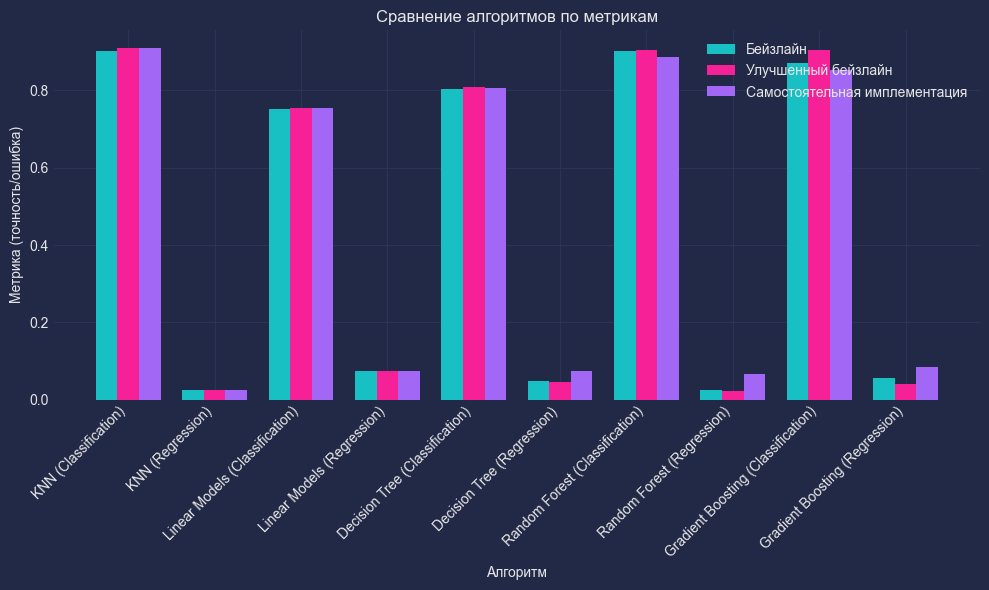

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('https://raw.githubusercontent.com/dhaitz/matplotlib-stylesheets/master/pitayasmoothie-dark.mplstyle')

algorithms = [
    "KNN (Classification)", "KNN (Regression)",
    "Linear Models (Classification)", "Linear Models (Regression)",
    "Decision Tree (Classification)", "Decision Tree (Regression)",
    "Random Forest (Classification)", "Random Forest (Regression)",
    "Gradient Boosting (Classification)", "Gradient Boosting (Regression)"
]


baseline = [
    0.9025, 0.025, 0.753, 0.07295, 0.80375, 0.0487121, 0.9025, 0.0242, 0.87, 0.056177
]

improved_baseline = [
    0.91, 0.0237, 0.75375, 0.072958, 0.80875, 0.046489, 0.905, 0.0231, 0.905, 0.04029
]

own_implementation = [
    0.91, 0.0246, 0.75375, 0.0729595945, 0.8075, 0.07423, 0.8875, 0.065, 0.8525, 0.0847192
]

x = np.arange(len(algorithms))
width = 0.25 

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, baseline, width, label='Бейзлайн')
rects2 = ax.bar(x, improved_baseline, width, label='Улучшенный бейзлайн')
rects3 = ax.bar(x + width, own_implementation, width, label='Самостоятельная имплементация')

ax.set_xlabel('Алгоритм')
ax.set_ylabel('Метрика (точность/ошибка)')
ax.set_title('Сравнение алгоритмов по метрикам')
ax.set_xticks(x)
ax.set_xticklabels(algorithms, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()


<div align="center" style="font-family: Arial; background-color: #f0f0f0; padding: 40px; border-radius: 10px; width: 60%; margin: auto;">
  <span style="font-style: italic; color: #333;">В следующей таблице в ячейках, относящихся к классификации я буду отображать <strong>accuracy</strong>; в ячейках, относящихся к регрессии я буду отображать <strong>MSE</strong></span>
  <br>
  <span style="font-style: italic; color: #333;">*Метрика качества на тестовом наборе данных*</span>
  <table border="1" cellpadding="10">
    <tr style="background-color: #f2f2f2; text-align: center; font-weight: bold; color: #333;">
  <th rowspan="1" style="padding: 10px; border: 1px solid #ddd; background-color: #0099cc; color: white;">Алгоритм</th>
  <th style="padding: 10px; border: 1px solid #ddd; background-color: #0099cc; color: white;">Задача</th>
  <th style="padding: 10px; border: 1px solid #ddd; background-color: #0099cc; color: white;">Бейзлайн</th>
  <th style="padding: 10px; border: 1px solid #ddd; background-color: #0099cc; color: white;">Улучшенный бейзлайн</th>
  <th style="padding: 10px; border: 1px solid #ddd; background-color: #0099cc; color: white;">Самостоятельная имплементация алгоритма</th>
  </tr>
    <tr style="background-color: #f2f2f2; text-align: center; font-weight: bold; color: #333;">
      <td rowspan="2">KNN</td>
      <td>классификация</td>
      <td style="color: #9c0006;">0.9025</td>
      <td style="color: #006100;">0.91</td>
      <td style="color: #006100;">0.91</td>
    </tr>
    <tr style="background-color: #f2f2f2; text-align: center; font-weight: bold; color: #333;">
      <td>регрессия</td>
      <td style="background-color: #00BFFF30; color: #9c0006;">0.025</td>
      <td style="background-color: #00BFFF30; color: #006100;">0.0237</td>
      <td style="background-color: #00BFFF30; color: #9c0006;">0.0246</td>
    </tr>
    <tr style="background-color: #f2f2f2; text-align: center; font-weight: bold; color: #333;">
      <td rowspan="2">Линейные модели</td>
      <td>классификация</td>
      <td style="color: #9c0006;">0.753</td>
      <td style="color: #006100;">0.75375</td>
      <td style="color: #006100;">0.75375</td>
    </tr>
    <tr style="background-color: #f2f2f2; text-align: center; font-weight: bold; color: #333;">
      <td>регрессия</td>
      <td style="background-color: #00BFFF30; color: #9c0006;">0.0729599</td>
      <td style="background-color: #00BFFF30; color: #9c0006;">0.072958</td>
      <td style="background-color: #00BFFF30; color: #006100;">0.0729595945</td>
    </tr>
    <tr style="background-color: #f2f2f2; text-align: center; font-weight: bold; color: #333;">
      <td rowspan="2">Решающее дерево</td>
      <td>классификация</td>
      <td style="color: #006100;">0.80375</td>
      <td style="color: #006100;">0.80875</td>
      <td style="color: #9c0006;">0.8075</td>
    </tr>
    <tr style="background-color: #f2f2f2; text-align: center; font-weight: bold; color: #333;">
      <td>регрессия</td>
      <td style="background-color: #00BFFF30; color: #9c0006;">0.0487121</td>
      <td style="background-color: #00BFFF30; color: #006100;">0.046489</td>
      <td style="background-color: #00BFFF30; color: #9c0006;">0.07423</td>
    </tr>
    <tr style="background-color: #f2f2f2; text-align: center; font-weight: bold; color: #333;">
      <td rowspan="2">Случайный лес</td>
      <td>классификация</td>
      <td style="color: #9c0006;">0.9025</td>
      <td style="color: #006100;">0.905</td>
      <td style="color: #9c0006;">0.8875</td>
    </tr>
    <tr style="background-color: #f2f2f2; text-align: center; font-weight: bold; color: #333;">
      <td>регрессия</td>
      <td style="background-color: #00BFFF30; color: #9c0006;">0.0242</td>
      <td style="background-color: #00BFFF30; color: #006100;">0.0231</td>
      <td style="background-color: #00BFFF30; color: #9c0006;">0.065</td>
    </tr>
    <tr style="background-color: #f2f2f2; text-align: center; font-weight: bold; color: #333;">
      <td rowspan="2">Градиентный бустинг</td>
      <td>классификация</td>
      <td style="color: #9c0006;">0.87</td>
      <td style="color: #006100;">0.905</td>
      <td style="color: #9c0006;">0.8525</td>
    </tr>
    <tr style="background-color: #f2f2f2; text-align: center; font-weight: bold; color: #333;">
      <td>регрессия</td>
      <td style="background-color: #00BFFF30; color: #9c0006;">0.056177</td>
      <td style="background-color: #00BFFF30; color: #006100;">0.04029</td>
      <td style="background-color: #00BFFF30; color: #9c0006;">0.0847192</td>
    </tr>
  </table>
    <h2 style="color: #333; text-align: center; font-weight: bold;">Выводы:</h2>
    <ul style="font-size: 18px; color: #555; line-height: 1.6;">
        <li><strong>KNN и Случайный лес</strong> продемонстрировали стабильно высокие результаты как в классификации, так и в регрессии.</li>
        <li>Для классификации стоит предпочесть <strong>KNN</strong>, так как он показал наилучший <span style="color: #00BFFF;">accuracy</span> среди всех алгоритмов.</li>
        <li>Для регрессии <strong>Случайный лес</strong> обеспечил наилучший результат по метрике <span style="color: #ff6347;">MAE</span>, что делает его наиболее подходящим для этой задачи.</li>
    </ul> 
</div>


<div align="center" style="font-family: Arial, sans-serif; background-color: #f0f0f0; padding: 20px; border-radius: 10px; width: 60%; margin: auto;">

---

<h5 style="color: #2E64FE; font-weight: bold; text-align: center;">Студент: <span style="font-style: italic; color: #333;">Королев И.С.</span></h5>
<h6 style="color: #333; font-weight: normal; text-align: center;">Группа: <span style="font-weight: bold;">М80-408Б-21</span></h4>
<h5 style="color: #333; text-align: center;">Дата: 14.12.2024</h5>

---

</div>
